In [4]:
!git clone https://github.com/manu156/DS250
PATH = "DS250/full_onion_data.csv"

Cloning into 'DS250'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 11 (delta 1), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
torch.cuda.is_available()
device=torch.device("cuda:0")
device
if torch.cuda.is_available():
  device=torch.device("cuda:0")
  print("running on gpu")
else:
  device=torch.device("cpu")
  print("running on cpu")

torch.cuda.device_count()


running on gpu


1

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
PATH = "DS250/full_onion_data.csv"

df = pd.read_csv(PATH)
df = df.drop(['Unnamed: 0', 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MIN', 'MAX'], axis= 1)
df['DATE'] = df['DATE'].apply(lambda x: datetime.strptime(x, "%d %b %Y"))
df = df.set_index("DATE")
df['MODAL'] = df['MODAL'].apply(lambda x: int(x))
df.sort_index(inplace=True)
df

,MODAL
DATE,
2010-01-01,1250
2010-01-02,1375
2010-01-04,1150
2010-01-05,1125
2010-01-07,1150
...,...
2020-08-26,1450
2020-08-27,1650
2020-08-28,1600


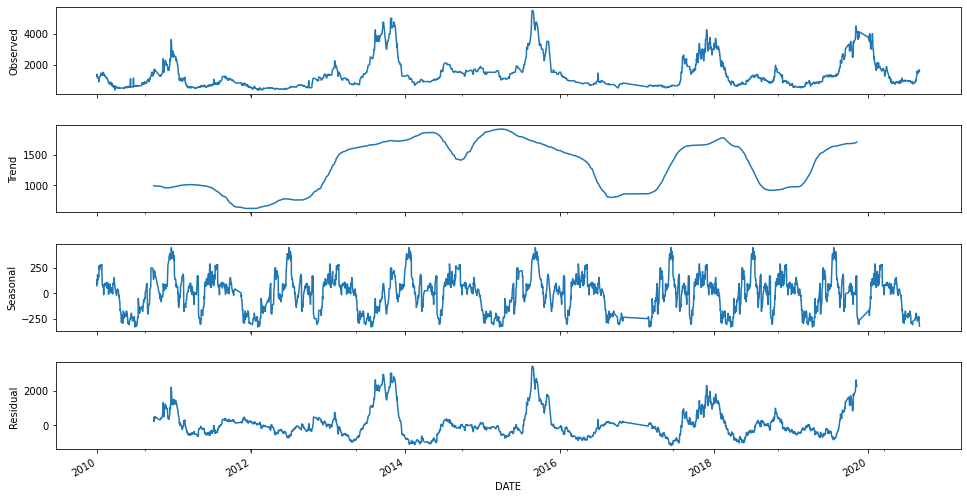

In [ ]:
res = sm.tsa.seasonal_decompose(df["MODAL"].dropna(),freq=365)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [7]:
#train_test_split
tr_st = '2010-01-01'
tr_end = '2019-08-01'

ts_st ='2019-08-02'
ts_end ='2020-08-31'

tra = df['MODAL'][tr_st:tr_end]
tes = df['MODAL'][ts_st:ts_end]
display(tra)
display(tes)

DATE
2010-01-01    1250
2010-01-02    1375
2010-01-04    1150
2010-01-05    1125
2010-01-07    1150
              ... 
2019-07-25    1250
2019-07-27    1250
2019-07-30    1225
2019-07-31    1325
2019-08-01    1325
Name: MODAL, Length: 2425, dtype: int64

DATE
2019-08-02    1275
2019-08-03    1375
2019-08-04    1275
2019-08-05    1275
2019-08-06    1300
              ... 
2020-08-26    1450
2020-08-27    1650
2020-08-28    1600
2020-08-29    1550
2020-08-31    1625
Name: MODAL, Length: 257, dtype: int64

In [ ]:
res = sm.tsa.adfuller(df['MODAL'],regression='ct')
res

(-4.477168704414876,
 0.0016446706174799472,
 25,
 2656,
 {'1%': -3.9621825837088234,
  '10%': -3.1280240515657614,
  '5%': -3.4121442953842265},
 33412.09849989506)

In [ ]:
res = sm.tsa.adfuller(df['MODAL'].diff().dropna(),regression='c')
res

(-10.231608651723315,
 5.011792573997714e-18,
 21,
 2659,
 {'1%': -3.432811686398781,
  '10%': -2.5673489606664854,
  '5%': -2.8626275885637775},
 33416.304989978125)

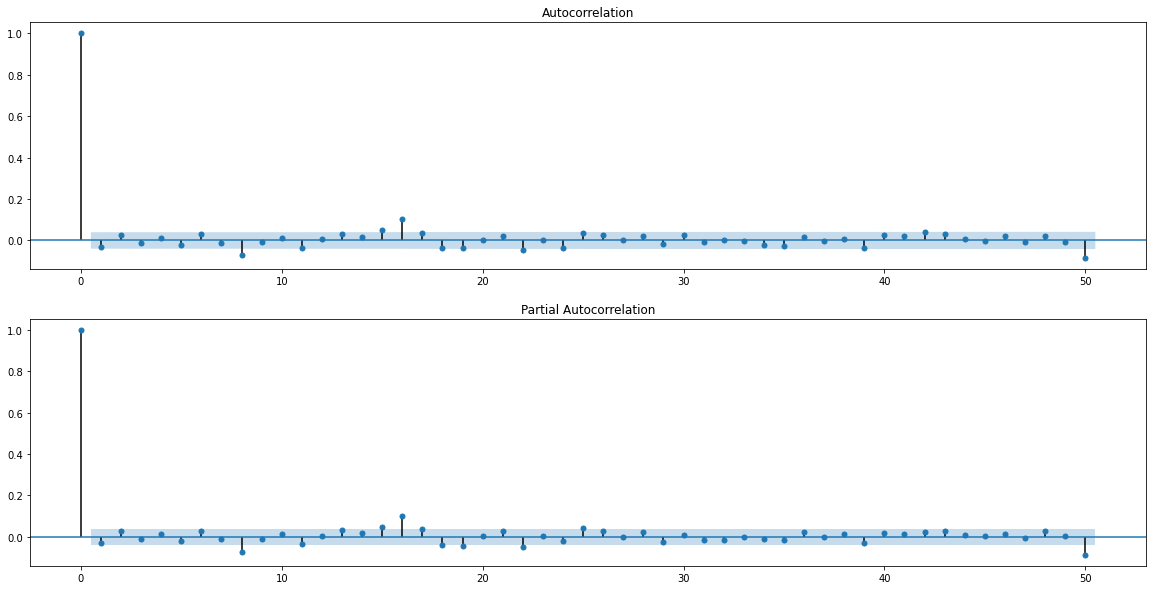

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(tra.diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(tra.diff().dropna(), lags=50, ax=ax[1])
plt.show()

In [ ]:

resDiff = sm.tsa.arma_order_select_ic(tra, max_ar=10, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/s

ARMA(p,q) = (3, 2) is the best.


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [ ]:
mod = sm.tsa.statespace.SARIMAX(tra,order=(3,1,2),seasonal_order=(0,0,0,0), frq='W',
                                 enforce_stationarity=False, enforce_invertibility=False)
fit_res = mod.fit(disp=False, maxiter=250)
fit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  MODAL   No. Observations:                 2425
Model:               SARIMAX(3, 1, 2)   Log Likelihood              -15187.034
Date:                Sun, 18 Oct 2020   AIC                          30386.067
Time:                        12:11:35   BIC                          30420.819
Sample:                             0   HQIC                         30398.704
                               - 2425                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6229      0.098    -16.526      0.000      -1.815      -1.430
ar.L2         -0.8444      0.091     -9.300      0.000      -1.022      -0.666
ar.L3         -0.0136      0.015     -0.913      0.361      -0.043       0.016
ma.L1          1.5963      0.098     16.255      0.000       1.404       1.789
ma.L2          0.8197      0.086      9.572      0.000       0.652       0.988
sigma2      1.651e+04     92.986    177.589      0.000    1.63e+04    1.67e+04
===================================================================================
Ljung-Box (Q):                       91.84   Jarque-Bera (JB):            367290.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -2.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        63.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

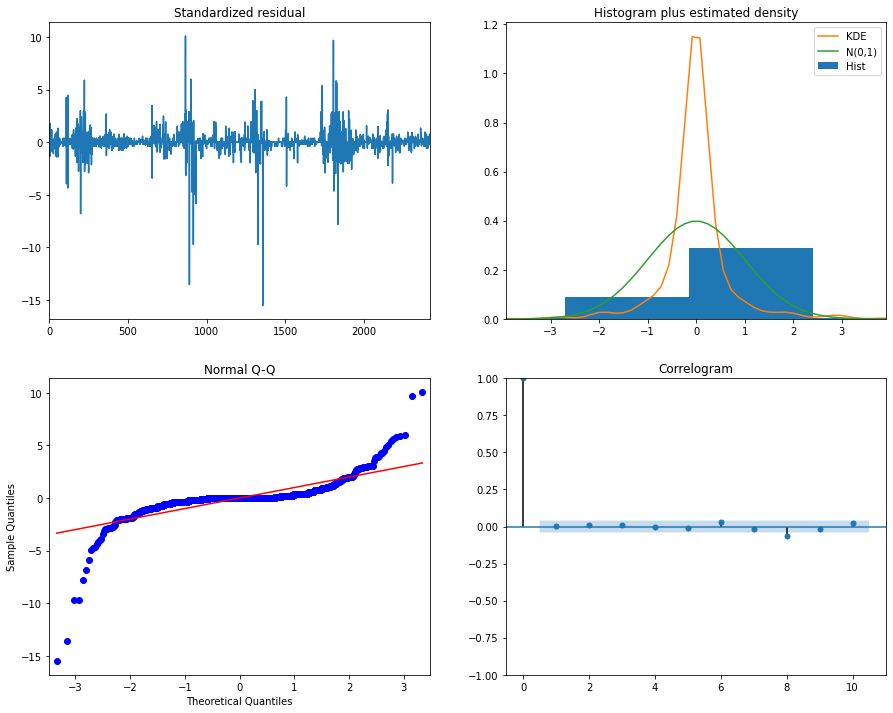

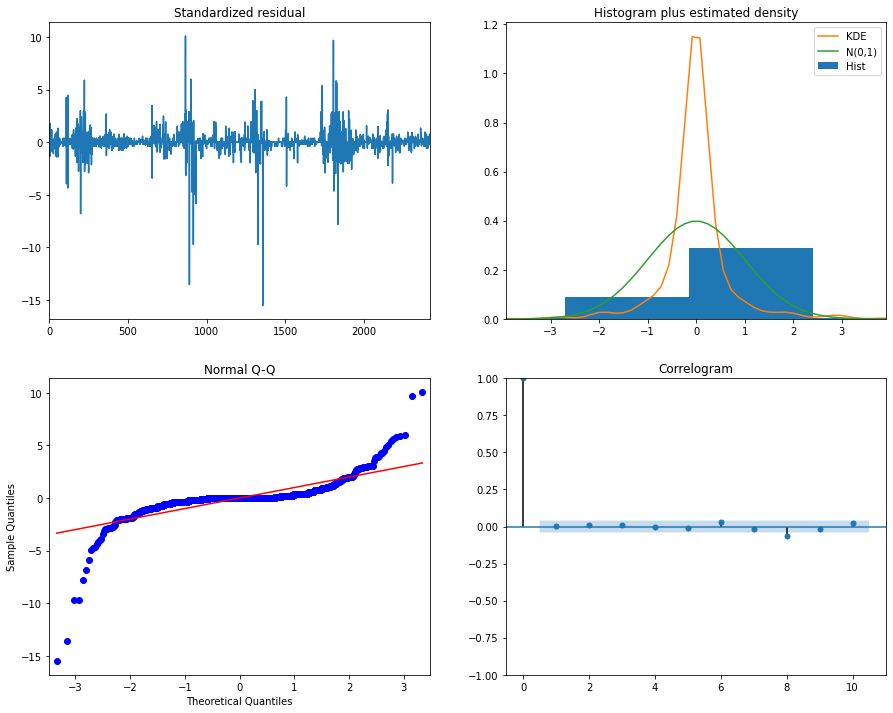

In [ ]:
fit_res.plot_diagnostics(figsize=(15, 12))

In [ ]:
mod = sm.tsa.statespace.SARIMAX(tra,order=(3,1,2),seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False)
fit_res = mod.fit()


In [1]:
import statsmodels.api as sm
# dh = df.asfreq('D')
dh = dh.fillna(method='bfill').fillna(method='ffill')
display(dh)
display(df.plot())
decomposition = sm.tsa.seasonal_decompose(dh['MODAL'], model='additive', freq=730)
                            # extrapolate_trend='freq') #additive or multiplicative is data specific


fig = decomposition.plot()
plt.gcf().set_size_inches(20, 10)
plt.show()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


NameError: ignored

In [ ]:

from pmdarima.arima import ndiffs
kpss_diff = ndiffs(dh['MODAL'].values, alpha=0.05, test='kpss', max_d=12)
adf_diff = ndiffs(dh['MODAL'].values, alpha=0.05, test='adf', max_d=12)
n_diffs = max(adf_diff , kpss_diff )
n_diffs

1

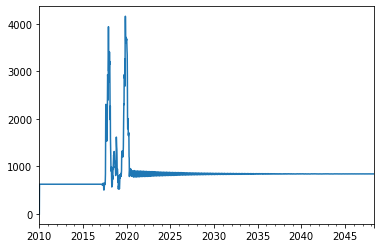

In [ ]:
import statsmodels.api as sm
dh = df.asfreq('W')
dh = dh.fillna(method='bfill').fillna(method='ffill')
mod = sm.tsa.statespace.SARIMAX(dh['MODAL'],order=(3,1,2),seasonal_order=(1,0,1,12),enforce_invertibility=False)
results = mod.fit()
# exog_forecast = df[478:][['holiday']]
fcast = results.predict(0,2000)
fcast.plot()

In [ ]:
# Forecast
n_periods = 24
fitted, confint = mod.predict(fit_res.params, n_periods=n_periods,  
                                  return_conf_int=True)

# index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# # make series for plotting purpose
# fitted_series = pd.Series(fitted, index=index_of_fc)
# lower_series = pd.Series(confint[:, 0], index=index_of_fc)
# upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# # Plot
# plt.plot(data['value'])
# plt.plot(fitted_series, color='darkgreen')
# plt.fill_between(lower_series.index, 
#                  lower_series, 
#                  upper_series, 
#                  color='k', alpha=.15)

# plt.title("SARIMAX Forecast of a10 - Drug Sales")
# plt.show()

NameError: ignored

In [ ]:
pred = fit_res.get_prediction()
pred_ci = pred.conf_int()
pred_ci

,lower MODAL,upper MODAL
DATE,,
2010-01-01,-2771.807649,2771.807649
2010-01-02,-2758.225675,3229.626112
2010-01-04,-1153.536650,3137.157047
2010-01-05,909.088619,1929.300188
2010-01-07,776.149383,1523.016318
...,...,...
2019-07-25,999.676057,1503.401024
2019-07-27,996.766126,1500.491093
2019-07-30,999.065543,1502.790509


In [ ]:
fcc = fit_res.forecast(steps=396)
fcc

2425    1327.873914
2426    1324.546638
2427    1327.519711
2428    1325.465134
2429    1326.334363
           ...     
2816    1326.209650
2817    1326.209650
2818    1326.209650
2819    1326.209650
2820    1326.209650
Length: 396, dtype: float64

In [ ]:
mod2 = sm.tsa.statespace.SARIMAX(df["MODAL"],order=(3,1,2),seasonal_order=(0,0,0,0), frq='D',
                                 enforce_stationarity=False, enforce_invertibility=False)
res = mod2.filter(fit_res.params)

In [ ]:
predict = res.get_prediction()
predict_ci = predict.conf_int()


In [ ]:
predict_dy = res.get_prediction()
predict_dy_ci = predict_dy.conf_int()

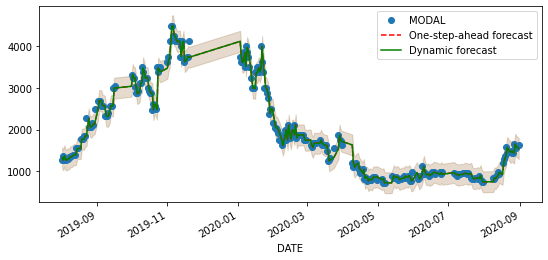

In [ ]:
fig, ax = plt.subplots(figsize=(9,4))
npre = 4

# Plot data points
df.loc[ts_st:].plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc[ts_st:].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc[ts_st:]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
predict_dy.predicted_mean.loc[ts_st:].plot(ax=ax, style='g', label='Dynamic forecast')
ci = predict_dy_ci.loc[ts_st:]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='upper right')


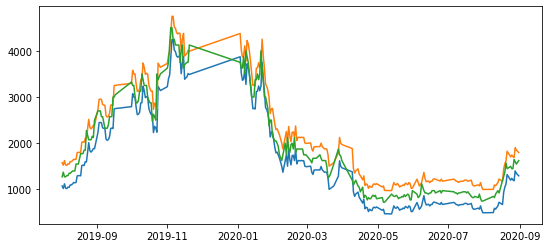

In [ ]:
fig, ax = plt.subplots(figsize=(9,4))
ax.plot(predict_dy_ci[ts_st:])
ax.plot(df[ts_st:])


In [ ]:
from sklearn.metrics import mean_squared_error
print('ARIMA model MSE:{}'.format(mean_squared_error(tes,predict.predicted_mean.loc[ts_st:])))

ARIMA model MSE:27671.1551331024


In [ ]:
import requests
from io import BytesIO
# Dataset
friedman2 = requests.get('https://www.stata-press.com/data/r12/friedman2.dta').content
data = pd.read_stata(BytesIO(friedman2))
data.index = data.time
data.index.freq = "QS-OCT"

# Variables
endog = data.loc['1959':'1981', 'consump']
exog = sm.add_constant(data.loc['1959':'1981', 'm2'])

In [ ]:
sm.add_constant(data.loc['1959':'1981', 'm2'])

,const,m2
time,,
1959-01-01,1.0,289.149994
1959-04-01,1.0,294.049988
1959-07-01,1.0,296.730011
1959-10-01,1.0,297.799988
1960-01-01,1.0,299.350006
...,...,...
1980-10-01,1.0,1601.099976
1981-01-01,1.0,1638.000000
1981-04-01,1.0,1670.550049


In [ ]:
# TEST
endog = data.loc['2015':, 'MODAL']
exog = sm.add_constant(data.loc['2015':, 'MODAL'])
nobs = endog.shape[0]

# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog.loc[:'1978-01-01'], exog=exog.loc[:'1978-01-01'], order=(1,0,1))
fit_res = mod.fit(disp=False, maxiter=250)
print(fit_res.summary())

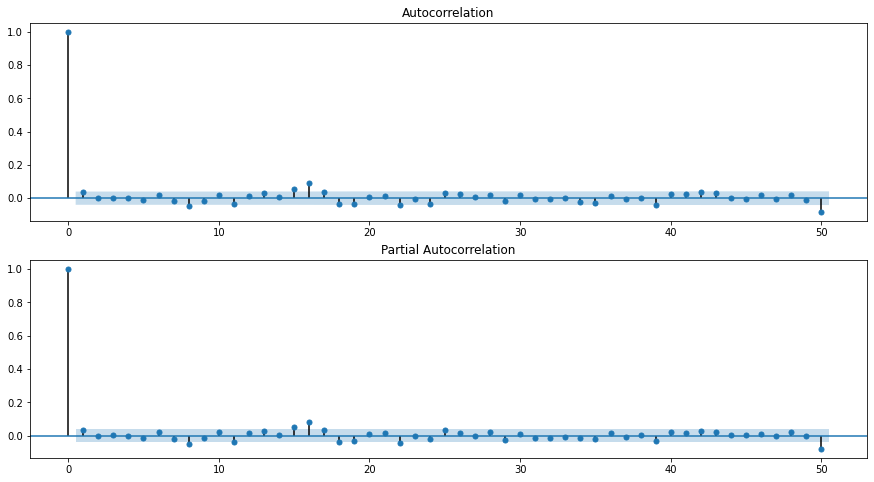

In [ ]:
res = arima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()


,Forecast
DATE,
2019-08-02,1327.851551
2019-08-03,1326.017319
2019-08-04,1327.386937
2019-08-05,1326.354576
2019-08-06,1327.134725
...,...
2020-08-26,1326.798862
2020-08-27,1326.798862
2020-08-28,1326.798862


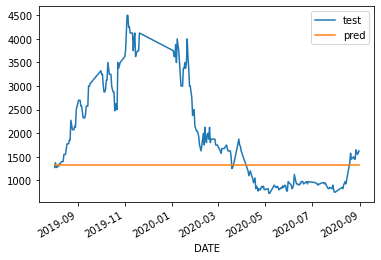

In [ ]:

# Name: MODAL, Length: 257

mod = sm.tsa.statespace.SARIMAX(tra,order=(3,1,2),seasonal_order=(0,0,0,0), frq='W')
fit_res = mod.fit(disp=False, maxiter=250)

dts = tes.index
fcast=fit_res.forecast(257, alpha=0.05)
fcast=pd.DataFrame({"Forecast": fcast, "DATE": dts})
fcast = fcast.set_index("DATE")
display(fcast)
# residuals = test_data - fcast.values
# residuals.head()

pd.DataFrame({'test':tes,'pred':fcast["Forecast"]}).plot();plt.show()

In [ ]:
# !pip3 install pyramid-arima
# !pip install pmdarima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(tra, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=1, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=9.16 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=31927.262, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=31312.810, Time=2.39 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=5.80 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=31927.630, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=30983.261, Time=5.25 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=24.53 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=8.36 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=30982.873, Time=1.58 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=31314.472, Time=0.59 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=15.36 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=10.32 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=30983.354, Time=4.87 sec


KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import pmdarima as pm
from pmdarima import model_selection

print("pmdarima version: %s" % pm.__version__)

# Load the data and split it into separate pieces
data = df
train, test = model_selection.train_test_split(data, train_size=165)

# Even though we have a dedicated train/test split, we can (and should) still
# use cross-validation on our training set to get a good estimate of the model
# performance. We can choose which model is better based on how it performs
# over various folds.
model1 = pm.ARIMA(order=(2, 1, 1))
model2 = pm.ARIMA(order=(1, 1, 2),
                  seasonal_order=(0, 1, 1, 12),
                  suppress_warnings=True)
cv = model_selection.SlidingWindowForecastCV(window_size=100, step=24, h=1)

model1_cv_scores = model_selection.cross_val_score(
    model1, train, scoring='smape', cv=cv, verbose=2)

model2_cv_scores = model_selection.cross_val_score(
    model2, train, scoring='smape', cv=cv, verbose=2)

print("Model 1 CV scores: {}".format(model1_cv_scores.tolist()))
print("Model 2 CV scores: {}".format(model2_cv_scores.tolist()))

# Pick based on which has a lower mean error rate
m1_average_error = np.average(model1_cv_scores)
m2_average_error = np.average(model2_cv_scores)
errors = [m1_average_error, m2_average_error]
models = [model1, model2]

# print out the answer
better_index = np.argmin(errors)  # type: int
print("Lowest average SMAPE: {} (model{})".format(
    errors[better_index], better_index + 1))
print("Best model: {}".format(models[better_index]))

pmdarima version: 1.7.1
[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
Model 1 CV scores: [5.558918407290703, 20.80872608074076, 16.376640895364247]
Model 2 CV scores: [2.6090549467947044, 45.67355839837478, 4.400533446078165]
Lowest average SMAPE: 14.248095127798571 (model1)
Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept


In [ ]:

import numpy as np
import pmdarima as pm
from pmdarima import model_selection
from matplotlib import pyplot as plt

print("pmdarima version: %s" % pm.__version__)

# Load the data and split it into separate pieces
y = df
est = pm.ARIMA(order=(1, 1, 2),
               seasonal_order=(0, 1, 1, 12),
               suppress_warnings=True)
cv = model_selection.SlidingWindowForecastCV(window_size=1000, step=1, h=4)
predictions = model_selection.cross_val_predict(
    est, y, cv=cv, verbose=2, averaging="median")

# plot the predictions over the original series
x_axis = np.arange(y.shape[0])
n_test = predictions.shape[0]

plt.plot(x_axis, y, alpha=0.75, c='b')
plt.plot(x_axis[-n_test:], predictions, alpha=0.75, c='g')  # Forecasts
plt.title("Cross-validated wineind forecasts")
plt.show()

pmdarima version: 1.7.1
[CV] fold=0 ..........................................................


KeyboardInterrupt: ignored

In [ ]:
arima = pm.auto_arima(tra, error_action='ignore', trace=True,d=1,
                      suppress_warnings=True, maxiter=100,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=30430.779, Time=7.93 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=30425.547, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=30427.137, Time=0.90 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=30427.235, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=30423.547, Time=0.04 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=30427.355, Time=0.61 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=30427.339, Time=0.68 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=30427.690, Time=2.20 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=30425.321, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=30425.435, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=30424.393, Time=0.63 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 14.348 seconds


In [ ]:
# Forecast
n_periods = 30
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(ts_st, periods = n_periods, freq='D')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
# plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

In [ ]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(tra, start_p=1, start_q=1,
                         test='adf',
                         max_p=4, max_q=4, m=12,
                         start_P=0, seasonal=True,
                         d=1, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

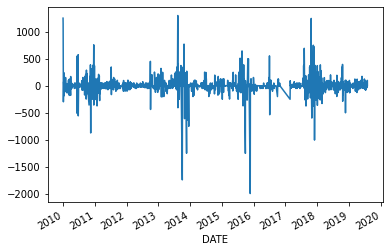

In [ ]:
arima.resid.plot()

In [ ]:
from sklearn.metrics import mean_squared_error
# te_end = '2020-08-31'
# t_end = '2019-08-01'

# tr_start,tr_end = '2014-01-01','2017-09-30'
# te_start,te_end = '2017-10-01','2017-12-31'

# tr_st = pd.to_datetime('2010-01-01')
# tr_end = pd.to_datetime('2019-08-01')

# ts_st = pd.to_datetime('2019-08-02')
# ts_end = pd.to_datetime('2020-08-31')

#pred = arima.predict(tr_end,te_end)[1:]
# res.plot_predict(start=datetime(2014,7,1), end=datetime(2018,9,28))
# pred = arima.predict(tr_st)
# pred
print('ARIMA model MSE:{}'.format(mean_squared_error(tes,fcast)))

ARIMA model MSE:1533309.7981641374


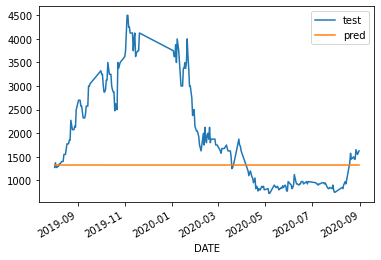

In [ ]:
pd.DataFrame({'test':tes,'pred':fcast["Forecast"]}).plot();plt.show()

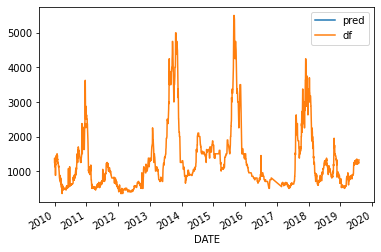

In [ ]:
# tra = df['MODAL'][:t_end]
pd.DataFrame({'pred':pred[t_end:], 'df':df['MODAL'][t_end:]}).plot();plt.show()

In [8]:
import numpy as np
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 30                # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    

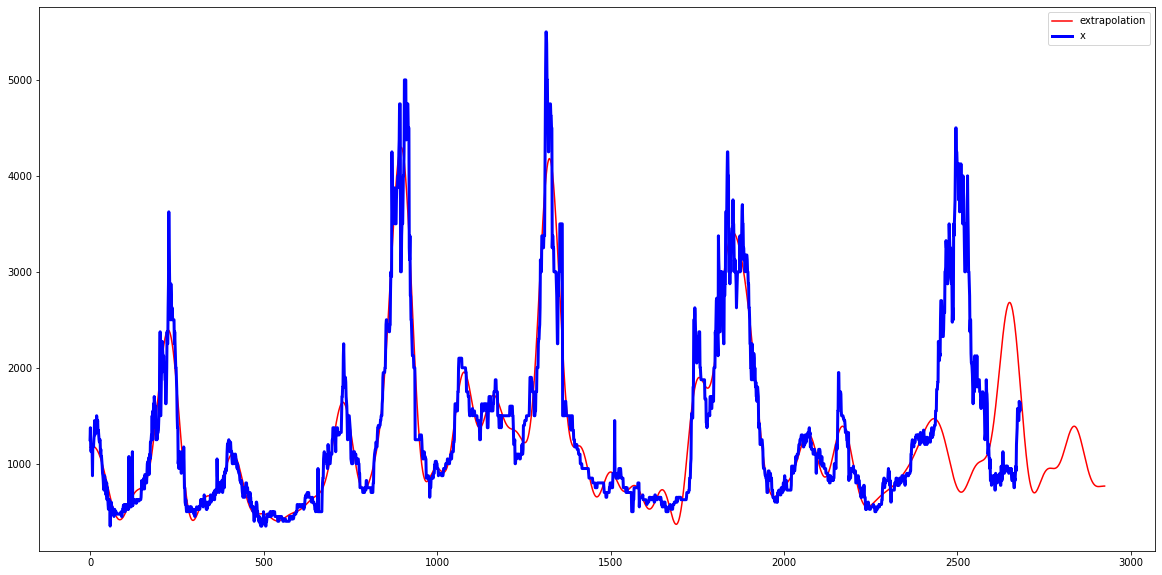

In [9]:
x = df['MODAL'][:tr_end]
n_predict = 500
extrapolation = fourierExtrapolation(x, n_predict)
x = df['MODAL']
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
pl.legend()
plt.gcf().set_size_inches(20, 10)
pl.show()